In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
startup = pd.read_csv('50_Startups.csv')

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.duplicated().sum()

0

In [8]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
st = startup.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MKTS'},axis=1)
st.head()

,RDS,ADM,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
st1 = st.drop(columns=['State'],axis=1)
st1.head()

,RDS,ADM,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Preparing Model

In [11]:
# Correlation analysis
st1.corr()

,RDS,ADM,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Build Model

In [12]:
model = smf.ols('Profit~RDS+ADM+MKTS',data = st1).fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           4.53e-30
Time:                        20:59:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MKTS             0.027228
dtype: float64

In [15]:
# t and p values
print(model.tvalues ,'\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
ADM          -0.525507
MKTS          1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADM          6.017551e-01
MKTS         1.047168e-01
dtype: float64


In [16]:
#squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

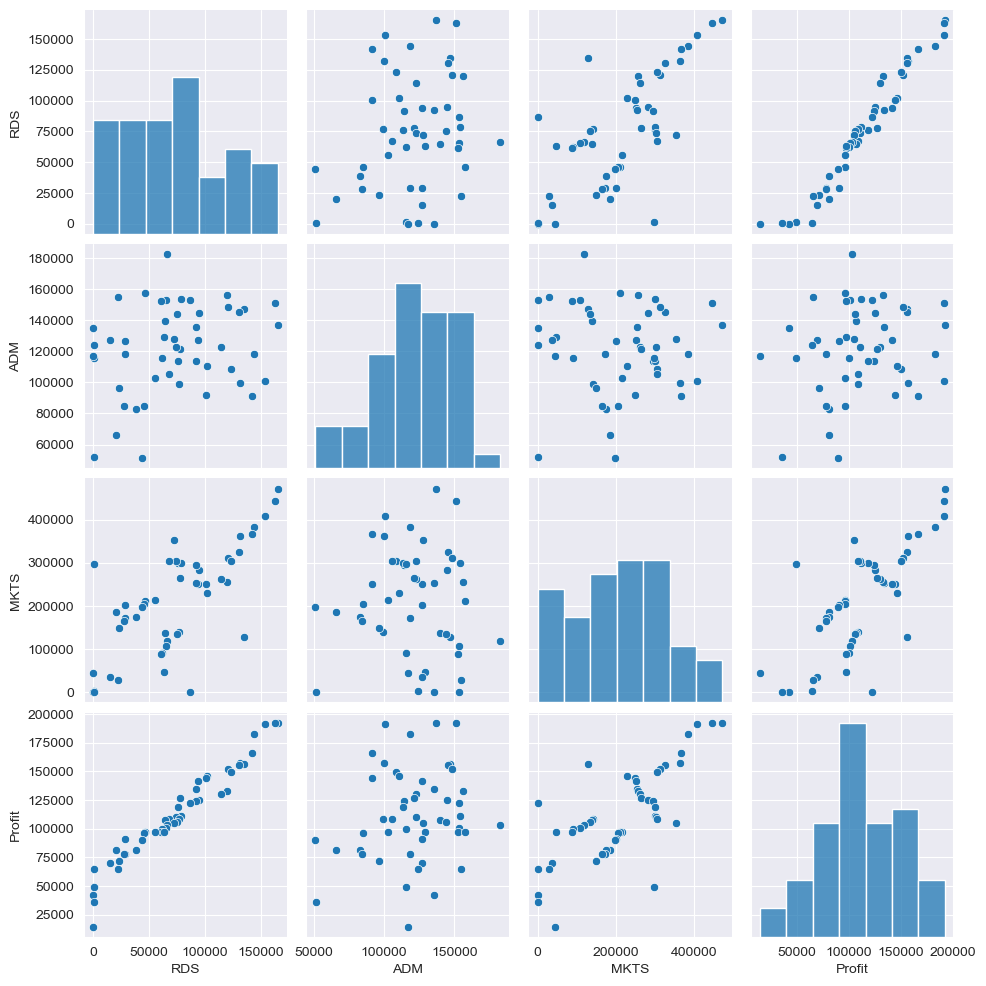

In [17]:
#format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(st1)

Calculating VIF

MOdel validation techniques
1.collinearity check
2.Residual analysis

In [24]:
#Calculating Variance Inflation factor vif = 1/1-r^2

rsq_rds = smf.ols('RDS~ADM+MKTS',data=st1).fit().rsquared
vif_rds = 1/(1-rsq_rds)
rsq_adm= smf.ols('ADM~RDS+MKTS',data=st1).fit().rsquared
vif_adm = 1/(1-rsq_adm)
rsq_mkts= smf.ols('MKTS~ADM+RDS',data=st1).fit().rsquared
vif_mkts = 1/(1-rsq_mkts)

#sorting values in a dataframe

d1 = {'variables':['RDS','ADM','MKTS'],'vif':[vif_rds,vif_adm,vif_mkts]}

vif_frame = pd.DataFrame(d1)
vif_frame





,variables,vif
0,RDS,2.468903
1,ADM,1.175091
2,MKTS,2.326773


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

Residual analysis


Test for normality of residuals (Q-Q plot)


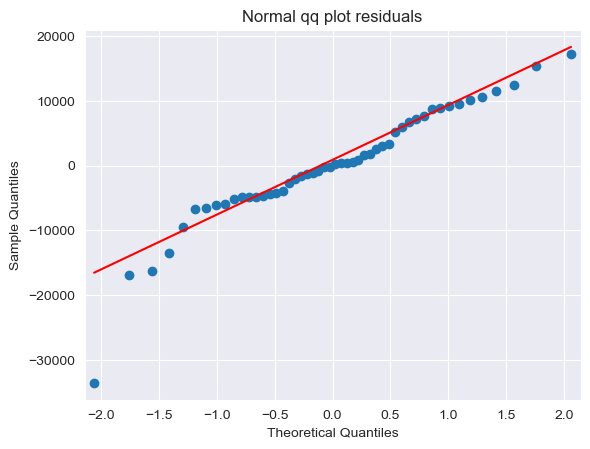

In [27]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title('Normal qq plot residuals')
plt.show()

In [28]:
list(np.where(model.resid<-10000))

[array([14, 15, 48, 49], dtype=int64)]

Residual plots for homoscedasticity

In [29]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

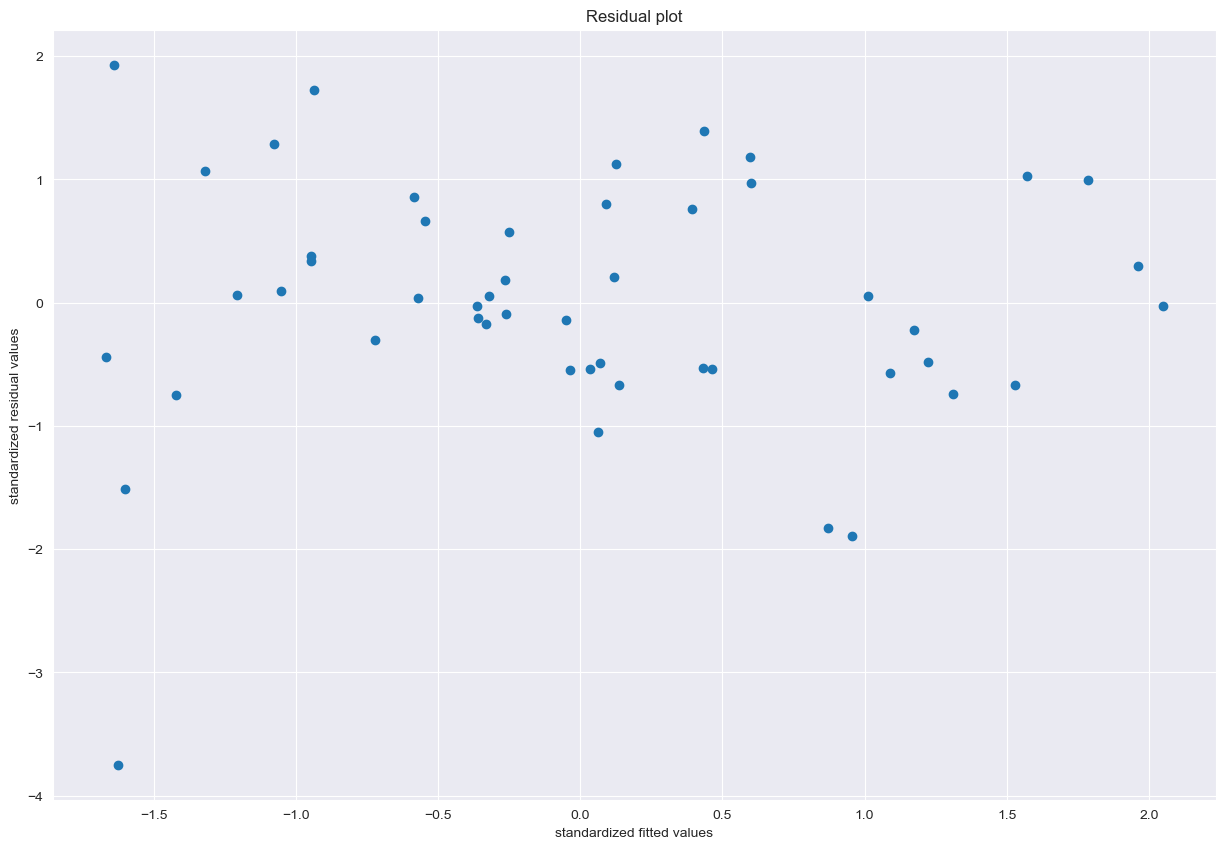

In [31]:
plt.figure(figsize=(15,10))
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

Residual vs Regressor

eval_env: 1


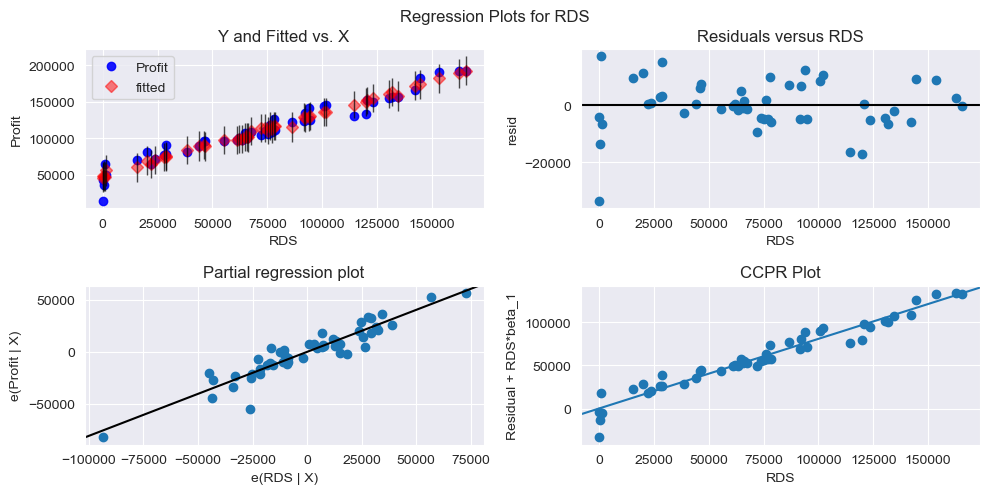

In [32]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model,'RDS',fig = fig)
plt.show()


eval_env: 1


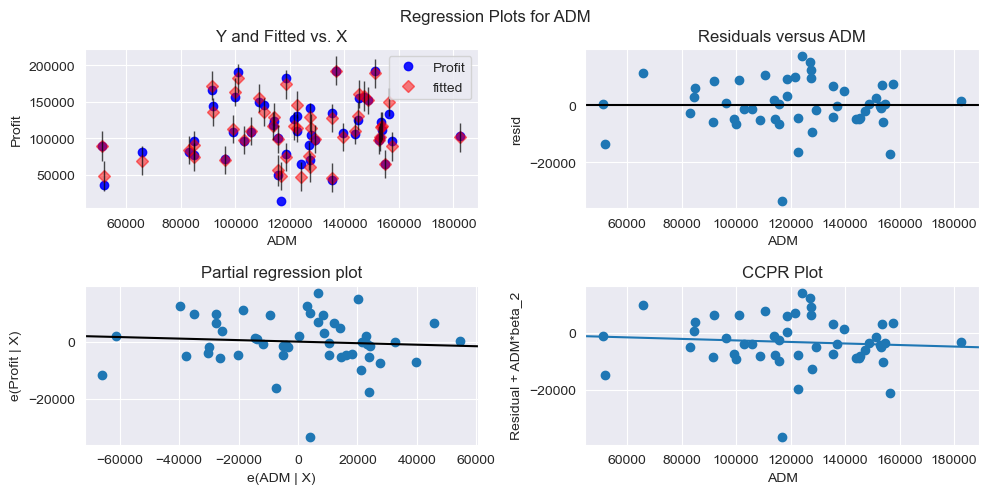

In [33]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model,'ADM',fig = fig)
plt.show()

eval_env: 1


<Figure size 1000x500 with 0 Axes>

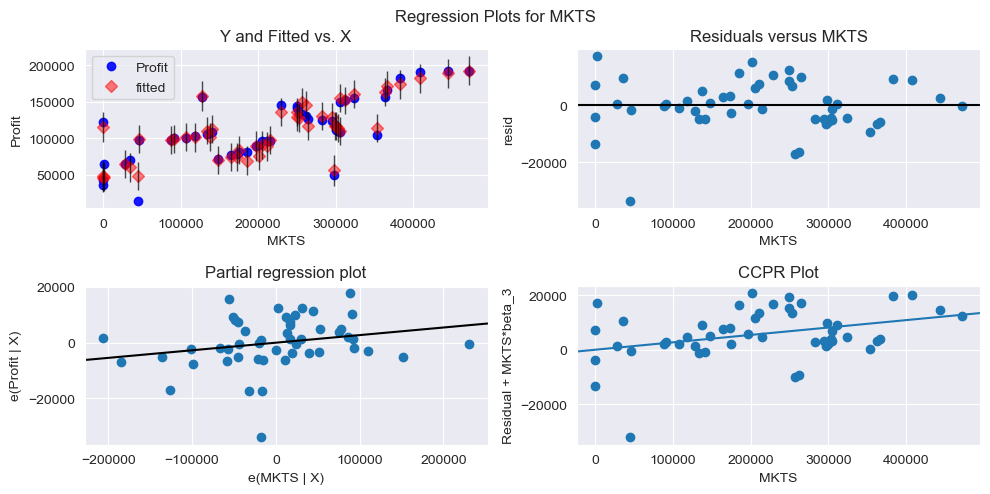

In [35]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model,'MKTS',fig = fig)
plt.show()

MODEL DELETION DIAGNOSTICS


Detecting Influencer/Outliers



Cook's Distance

In [42]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

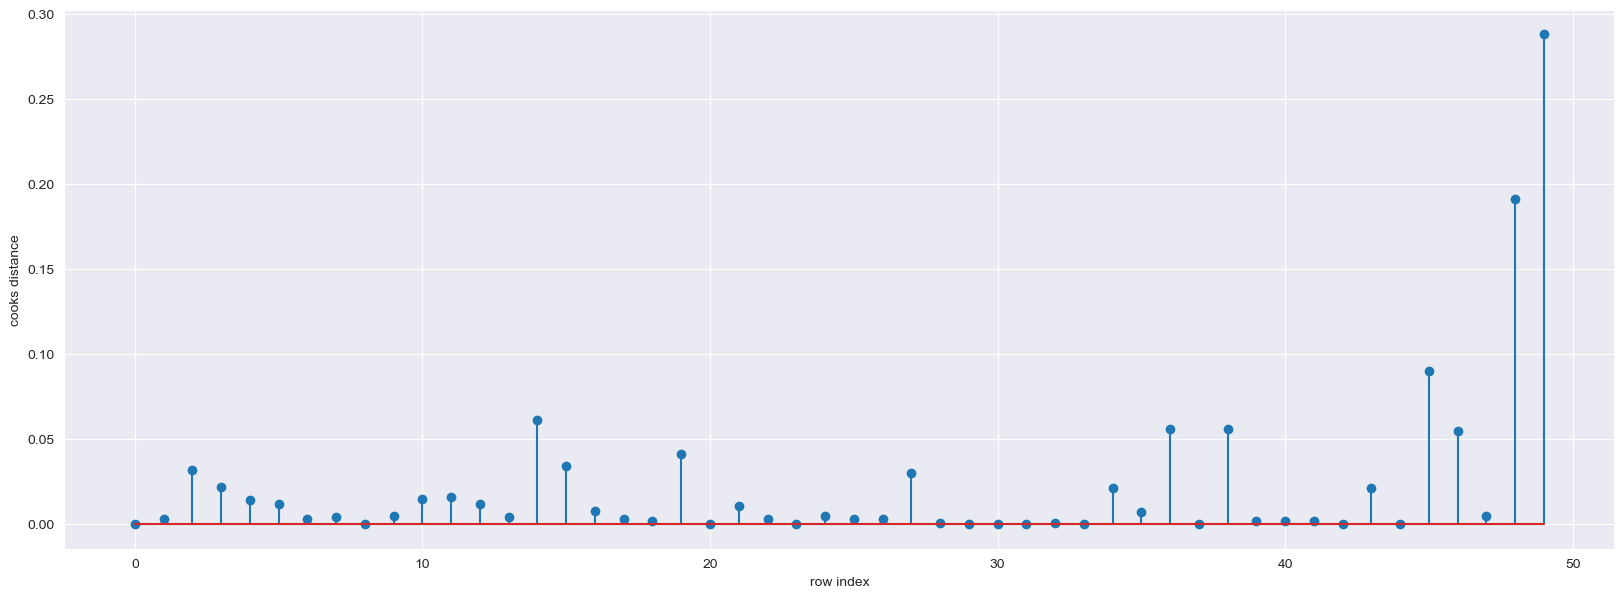

In [51]:
#plot the influencers values using stem plot
sns.set_style(style='darkgrid')
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(st1)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel("cooks distance")
plt.show()

High influence plots

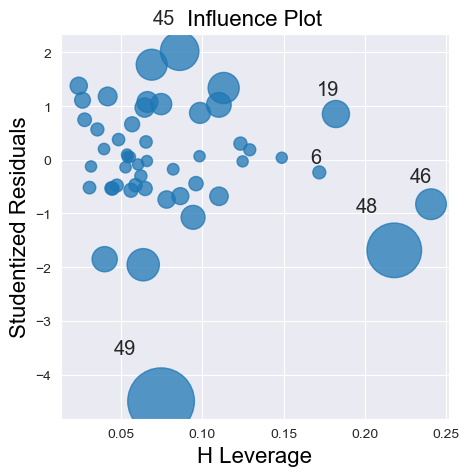

In [56]:
fig,ax = plt.subplots(figsize = (5,5))
fig = influence_plot(model , ax = ax)
plt.show()

In [57]:
k=st1.shape[1]     # k = no features or colunms & n = no of data points
n=st1.shape[0]
leavarage_cutoff = 3*((k+1)/n)
leavarage_cutoff

0.30000000000000004

In [59]:
st1[st1.index.isin([49])]

,RDS,ADM,MKTS,Profit
49,0.0,116983.8,45173.06,14681.4


In [61]:
st1.shape

(50, 4)

imporving the model

In [62]:
st2 = st1.copy()
st2

,RDS,ADM,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [63]:
st2 = st1.drop(st1.index[[49]],axis=0).reset_index(drop = True)
st2

,RDS,ADM,MKTS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


model deletion diagnostics & final model

In [66]:
Final_model = smf.ols('Profit~RDS+ADM+MKTS',data = st2).fit()
Final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           8.85e-32
Time:                        12:17:58   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDS            0.7830      0.038     20.470      0.000       0.706       0.860
ADM           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MKTS           0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model Prediction

In [68]:
#New Data for predction
new_data = pd.DataFrame({"RDS":78000,"ADM":127864,"MKTS":249839.44},index=[1])
new_data

,RDS,ADM,MKTS
1,78000,127864,249839.44


In [69]:
#manual prediction
Final_model.predict(new_data)

1    116922.184412
dtype: float64

In [70]:
#automatic prediction
pred_y = Final_model.predict(st2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64